In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.model_selection import train_test_split 

In [2]:
# Training dataset set
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# size of the dataset
train.shape

(891, 12)

In [4]:
# Testing dataset
test =pd.read_csv('test.csv')

In [5]:
# Checking null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train =train.drop(columns='Cabin', axis=1) 

# Dropping  the “Cabin” column from the data frame as it won’t be of much importance.

In [7]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

#Replacing the missing values in the “Age” column with the mean value of the Age column.

In [8]:
print(train['Embarked'].mode())

#Finding the mode value of the “Embarked” column as it will have occurred the maximum number of times

0    S
Name: Embarked, dtype: object


In [9]:
train['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [10]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

#Replacing the missing values in the “Embarked” column with mode value

In [11]:
train.isnull().sum()
# againchecking if there is any null value left in the dataset

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
train['Survived'].value_counts()
# So here 0 stands for dead people and 1 stands for alive people. 

0    549
1    342
Name: Survived, dtype: int64

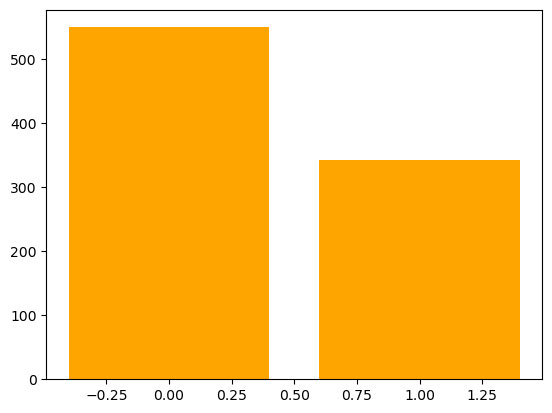

In [13]:
# visualizing the survived column. Here, dead people are more than alive.
plt.bar(list(train['Survived'].value_counts().keys()),list(train['Survived'].value_counts()),color = 'orange')
plt.show()

In [14]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

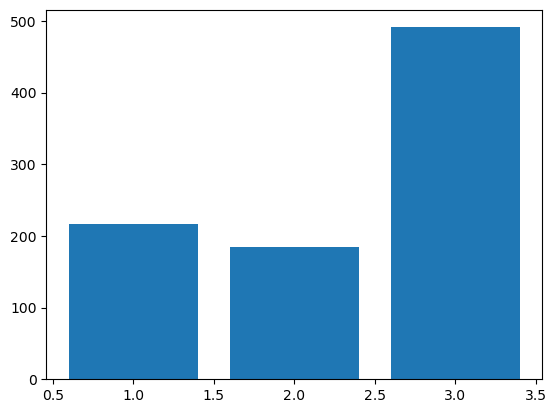

In [15]:
# Here we are visualizing the p class of the passenger. 1st class is the highest class, 2nd class is the medium and 3rd is for general passenger. 
# We can see here that 3rd class has the highest number of passengers.
plt.bar(list(train['Pclass'].value_counts().keys()),list(train['Pclass'].value_counts()))
plt.show()

In [16]:
train['Sex'].value_counts()


male      577
female    314
Name: Sex, dtype: int64

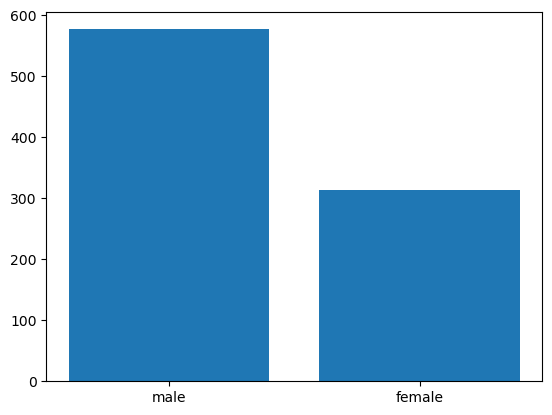

In [17]:
# Here we can see that there are more male passengers. 
plt.bar(list(train['Sex'].value_counts().keys()),list(train['Sex'].value_counts()))
plt.show()

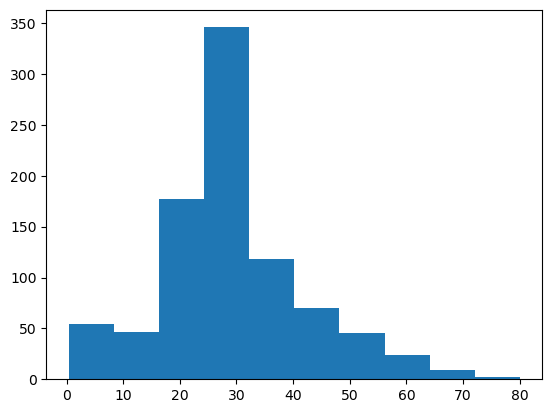

In [18]:
# Here we can see that most of the passengers were of age 20 - 30. 
plt.hist(train['Age'])
plt.show()

In [19]:
train.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
# here the categorical data is changed to integer value. column sex had 2 values, Male is 0 and female is 1. 
# Embarked column has 3 values. Embarked are basically places name from where the passenger got onto Titanic. s is 0, c is 1, q is 2.
# So the categorical column now is changed to interger type column.

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [21]:
#train= train.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)

In [22]:
train[['Embarked','Age','Fare']]=train[['Embarked','Age','Fare']].astype('int32')

In [23]:
# We are dividing our data into x and y. x carries all columns except 'PassengerId','Name','Ticket','Survived' because they 
# won't be helping much on our mode.
X = train.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
# y carries the output value that is the survived column.  
Y = train['Survived']

In [24]:
train.isnull().sum()
# Now there are no null values. 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Sex       891 non-null    int64
 2   Age       891 non-null    int32
 3   SibSp     891 non-null    int64
 4   Parch     891 non-null    int64
 5   Fare      891 non-null    int32
 6   Embarked  891 non-null    int32
dtypes: int32(3), int64(4)
memory usage: 38.4 KB


In [26]:
# splitting data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

'''X_train: contains a set of values from variable ‘ X ‘

Y_train: contains the output (whether the person is alive or dead) of the corresponding value of X_train.

X_test: contains a set of values from variable ‘ X ‘, excluding the ones from X_train.

Y_train: contains the output (whether the person is alive or dead) of the corresponding value of X_test.

test_size:  represents the percentage ratio of X_train:X_test (Here 0.2 means that the data will be segregated in the X_train and X_test variables in a 80:20 ratio). You can use any value you want. A value <0.3 is preferred'''

In [27]:
# We'll be using Logistic Regression for the model creation.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [28]:
model.fit(X_train, Y_train) # train the model, with our training values(X_train , Y_train)

C:\Users\Asus\newAnaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
# Prediction of training data 
X_train_prediction = model.predict(X_train)

In [31]:
# Finding accuracy score
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8146067415730337


We have an accuracy score of 81% which is ok. 
This means that our model is 81% accurate.

In [39]:
X_test_prediction = model.predict(X_test)

In [33]:
# The testing accuracy is 78 %
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7877094972067039


# Testing the model

In [34]:
input_data = (3,0,35,0,0,8.05,0)  # Note that these datas exclude the Survived data, as it is to be determined from the model itself


In [35]:
input_data_as_numpy_array = np.asarray(input_data)


In [36]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


In [37]:
prediction = model.predict(input_data_reshaped)
print(prediction)
if prediction[0]==0:
    print("Dead")
if prediction[0]==1:
    print("Alive")

[0]
Dead


C:\Users\Asus\newAnaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
